# Import packages

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx 
from collections import Counter
from fa2 import ForceAtlas2
from DataCleaningFunctions import DataCleaner, DataCollection, DataProcesser

# Data Collection 

In [3]:
params = {
        "thriller": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],[[]]]}, 
        "action": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]},             
        "comedy": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022"],["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"],["2000", "2001", "2002","2003","2004","2005","2006","2007"]]},
        "adventure": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [["2020", "2021", "2022", "2023"], ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"], ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"]]}, 
        "horror": {"years": ["2020", "2021", "2022", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019", "2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009"], 
                "sub_years": [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]},
        "fantasy": {"years": ["2020s","2010s", "2000s"],
                "sub_years": [[[]],[[]],[[]]]}, 
        "science_fiction": {"years": ["2020s", "2010s", "2000s"],
                "sub_years": [[[]],[[]],[[]]]}, 
        }

data_collection = DataCollection()
data_movie_artist = pd.DataFrame()
for genre in params.keys():
    for years, sub_years in zip(params[genre]["years"],params[genre]["sub_years"]):
        data = data_collection.collect_movies_artist_data(genre, years, sub_years)
        data_movie_artist = pd.concat([data_movie_artist, data]) 

data_movie_artist = data_movie_artist.reset_index(drop=True)
#data_movie_artist.to_csv('data_movie_artist.csv', index=False)

In [4]:
#data_movie_artist = pd.read_csv('data_movie_artist.csv')
data_movie_artist.shape

(7456, 7)

# Data Cleaning

In [5]:
data_cleaner = DataCleaner(data_movie_artist)
data_cleaner.clean_columns()
data_movie_artist_cleaned = data_cleaner.data

In [6]:
data_movie_artist_cleaned.shape

(5764, 7)

In [8]:
titles = pd.read_csv('titles.csv')

In [10]:
data_movie_artist_cleaned['Title']
titles['Title']

0                                    365 Days
1                                        7500
2                                   Archenemy
3                                   Asuraguru
4                                   Aswathama
                        ...                  
5759                                Renegades
5760               Scott Pilgrim vs the World
5761                               Skin Trade
5762    The League of Extraordinary Gentlemen
5763                              The Promise
Name: Title, Length: 5764, dtype: object

In [15]:
unique_titles = data_movie_artist_cleaned[~data_movie_artist_cleaned['Title'].isin(titles['Title'])]

In [16]:
unique_titles

Title                       Director  \
62                365 Days This Day  barbara biaowas tomasz mandes   
63                    Alice Darling                     mary nighy   
68                  Catwoman Hunted              shinsuke terasawa   
72              Don t Worry Darling                   olivia wilde   
81                The Devil s Light                   daniel stamm   
...                             ...                            ...   
5741           Underworld Awakening       mans marlind bjorn stein   
5742          Underworld Blood Wars                  anna foerster   
5747         47 Meters Down Uncaged               johannes roberts   
5750  Crouching Tiger Hidden Dragon                        ang lee   
5752               Dungeons Dragons               courtney solomon   

                                                   Cast  \
62    anna-maria sieklucka,michele morrone, rebecca ...   
63    anna kendrick,kaniehtiio horn, charlie carrick...   
68    elizabeth gillies,stephanie beatriz,jonathan b...   
72    florence pugh,harry styles, olivia wilde,gemma...   
81    virginia madsen,ben cross,colin salmon,jacquel...   
...                                                 ...   
5741           kate beckinsale,stephen rea,michael ealy   
5742  kate beckinsale,theo james,lara pulver,bradley...   
5747  sophie nelisse,corinne foxx,brianne tju,sistin...   
5750              chow yun-fat,michelle yeoh,zhang ziyi   
5752            justin whalin,marlon wayans,thora birch   

                           Country     Genre  Year  \
62                          Europe  Thriller  2022   
63            united states canada  Thriller  2022   
68                   united states    Action  2022   
72                   united states    Horror  2022   
81                   united states  Thriller  2022   
...                            ...       ...   ...   
5741                 united states       Mix  2012   
5742                 united states       Mix  2016   
5747  united states united kingdom       Mix  2019   
5750                          Asia    Action  2000   
5752                 united states   Fantasy  2000   

                              Hyperref  
62                  365_Days:_This_Day  
63                      Alice,_Darling  
68                    Catwoman:_Hunted  
72               Don%27t_Worry_Darling  
81                 The_Devil%27s_Light  
...                                ...  
5741             Underworld:_Awakening  
5742            Underworld:_Blood_Wars  
5747           47_Meters_Down:_Uncaged  
5750    Crouching_Tiger,_Hidden_Dragon  
5752  Dungeons_%26_Dragons_(2000_film)  

[1162 rows x 7 columns]

In [12]:
# Find titles in 'titles' that are not in 'data_movie_artist_cleaned'
unique_titles = titles[~titles['Title'].isin(data_movie_artist_cleaned['Title'])]


In [13]:
unique_titles

Unnamed: 0                  Title
61            61     365 Days: This Day
62            62         Alice, Darling
67            67       Catwoman: Hunted
71            71    Don't Worry Darling
80            80      The Devil's Light
...          ...                    ...
5744        6059        President's Day
5748        6063   Red: Werewolf Hunter
5751        6066         SS Doomtrooper
5773        6088  Tucker & Dale vs Evil
5775        6090  Underworld: Awakening

[1178 rows x 2 columns]

In [7]:
data_movie_artist_cleaned['Genre'].value_counts()

horror                              1726
comedy                               974
action                               522
thriller                             407
science_fiction                      401
adventure                            396
other                                293
fantasy                              250
action-science_fiction               126
action-thriller                      118
action-comedy                         78
adventure-fantasy                     74
comedy-horror                         60
comedy-fantasy                        52
horror-science_fiction                50
horror-thriller                       49
adventure-science_fiction             40
action-adventure-science_fiction      39
action-adventure                      38
adventure-comedy                      31
Name: Genre, dtype: int64

In [ ]:
# horror-thriller -> Horror 
# alt med fantasy der giver fantasy
# comedy - adventure -> comedy 
# adventure-science_fiction 
# action-adventure  -> action
# alt med scify der giver fantasy
# action - adventure -> action 
# action-comedy --> Action 
# comedy-horror --> horror
# adventure-comedy -> comedy 

In [16]:
data_movie_artist_cleaned[data_movie_artist_cleaned['Genre']=='other'].head(40) # horror

Title                    Director  \
103                                     Killers              robert luketic   
150                                      Looper                rian johnson   
170                      Christmas Icetastrophe            jonathan winfrey   
178                                     Mystery                     wu bing   
184                                 Tomb Robber                      yu dao   
194                        The Mystery of Death                    ben wong   
246                                   Frequency              gregory hoblit   
282                                 Vanilla Sky               cameron crowe   
298                 He Loves Me He Loves Me Not          laetitia colombani   
330                  Once Upon a Time in Mexico            robert rodriguez   
340                        The Butterfly Effect  eric bress j mackye gruber   
354                                 Night Watch           timur bekmambetov   
396                             Children of Men              alfonso cuaron   
417                              V for Vendetta             james mc teigue   
454                                  Timecrimes             nacho vigalondo   
483               The X Files I Want to Believe                chris carter   
502                                        Push              paul mc guigan   
522                               Ghosts of War                  eric bress   
529    Mortal Kombat Legends Scorpion s Revenge             ethan spaulding   
533                                   Peninsula                yeon sang ho   
550                   Batman The Long Halloween                chris palmer   
554                         Bright Samurai Soul             kyohei ishiguro   
568                               Mortal Kombat              simon mc quoid   
576   Shang Chi and the Legend of the Ten Rings       destin daniel cretton   
581                                  Brahmastra                ayan mukerji   
583                                     Morbius             daniel espinosa   
679              Abraham Lincoln Vampire Hunter           timur bekmambetov   
742                                     R I P D            robert schwentke   
779                         P 51 Dragon Fighter                 mark atkins   
805                                   Kung Fury              david sandberg   
926                  Gojoe Spirit War Chronicle                  sogo ishii   
944                                     Onmyoji               yojiro takita   
995                               The Medallion                 gordon chan   
1016                               Spider Man 2                   sam raimi   
1071                                Ghost Rider         mark steven johnson   
1102                                    Hancock                  peter berg   
1329                  The Sorcerer s Apprentice              jon turteltaub   
1696                                  Evolution                ivan reitman   
1719               The Lost Skeleton of Cadavra               larry blamire   
1871                                   Good Boy                john hoffman   

                                                   Cast        Country  Genre  \
103          ashton kutcher,katherine heigl,tom selleck  united states  other   
150       bruce willis,joseph gordon-levitt,emily blunt  united states  other   
170       victor webster,jennifer spence,richard harmon  united states  other   
178                         ady an,jiro wang,guo degang          china  other   
184                 michael tong,muqi miya, li bingyuan          china  other   
194                deric wan, huang zheng, josephine yu          china  other   
246          dennis quaid,james caviezel,andre braugher  united states  other   
282               tom cruise,penelope cruz,cameron diaz  united states  other   
298        audrey tautou,samuel le bihan,isabelle carre         france  o

In [29]:
data_movie_artist_cleaned

Title                       Director  \
0                                  365 Days  barbara biaowas tomasz mandes   
1                                      7500               patrick vollrath   
2                                 Archenemy            adam egypt mortimer   
3                                 Asuraguru                    a raajdheep   
4                                 Aswathama                    ramana teja   
...                                     ...                            ...   
5719                              Renegades                   steven quale   
5720             Scott Pilgrim vs the World                   edgar wright   
5721                             Skin Trade            ekachai uekrongtham   
5722  The League of Extraordinary Gentlemen             stephen norrington   
5723                            The Promise                     chen kaige   

                                                   Cast  \
0     [anna-maria sieklucka, michele morrone,  broni...   
1                   [joseph gordon-levitt, aylin tezel]   
2     [joe manganiello, skylan brooks,  zolee griggs...   
3     [vikram prabhu, mahima nambiar, subbaraju, yog...   
4                       [naga shourya, mehreen pirzada]   
...                                                 ...   
5719  [sullivan stapleton, j. k. simmons, charlie be...   
5720  [michael cera, mary elizabeth winstead, kieran...   
5721  [dolph lundgren, tony jaa, michael jai white, ...   
5722        [sean connery, shane west, stuart townsend]   
5723   [hiroyuki sanada, jang dong-gun, cecilia cheung]   

                           Country             Genre  Year  \
0                           europe          thriller  2020   
1                            other   action-thriller  2020   
2     united states united kingdom   action-thriller  2020   
3                            india   action-thriller  2020   
4                            india   action-thriller  2020   
...                            ...               ...   ...   
5719                        france  action-adventure  2017   
5720                 united states     action-comedy  2010   
5721                 united states   action-thriller  2014   
5722                 united states             other  2003   
5723                         china             other  2005   

                                          Hyperref  
0                             365_Days_(2020_film)  
1                                      7500_(film)  
2                                 Archenemy_(film)  
3                                        Asuraguru  
4                                 Aswathama_(film)  
...                                            ...  
5719                         Renegades_(2017_film)  
5720                   Scott_Pilgrim_vs._the_World  
5721                             Skin_Trade_(film)  
5722  The_League_of_Extraordinary_Gentlemen_(film)  
5723                       The_Promise_(2005_film)  

[5724 rows x 7 columns]

# test 

In [36]:
df_movies = data_movie_artist_cleaned.copy()

def find_connected_movies(movie, cast, df):
    # Find movies that share at least one cast member and are not the same movie
    connected_movies = df[df.apply(lambda x: any(actor in x['Cast'] for actor in cast) and x['Title'] != movie, axis=1)]
    return connected_movies['Title'].tolist()

# Create a new DataFrame for the results
results = []

for index, row in df_movies.iterrows():
    movie = row['Title']
    cast = row['Cast']
    connected = find_connected_movies(movie, cast, df_movies)
    results.append({'Movie': movie, 'Connected Movies': connected, 'Casts in the Movie': cast})

df_results = pd.DataFrame(results)



In [56]:
df_movies

Title                       Director  \
0                                  365 Days  barbara biaowas tomasz mandes   
1                                      7500               patrick vollrath   
2                                 Archenemy            adam egypt mortimer   
3                                 Asuraguru                    a raajdheep   
4                                 Aswathama                    ramana teja   
...                                     ...                            ...   
5719                              Renegades                   steven quale   
5720             Scott Pilgrim vs the World                   edgar wright   
5721                             Skin Trade            ekachai uekrongtham   
5722  The League of Extraordinary Gentlemen             stephen norrington   
5723                            The Promise                     chen kaige   

                                                   Cast  \
0     [anna-maria sieklucka, michele morrone,  broni...   
1                   [joseph gordon-levitt, aylin tezel]   
2     [joe manganiello, skylan brooks,  zolee griggs...   
3     [vikram prabhu, mahima nambiar, subbaraju, yog...   
4                       [naga shourya, mehreen pirzada]   
...                                                 ...   
5719  [sullivan stapleton, j. k. simmons, charlie be...   
5720  [michael cera, mary elizabeth winstead, kieran...   
5721  [dolph lundgren, tony jaa, michael jai white, ...   
5722        [sean connery, shane west, stuart townsend]   
5723   [hiroyuki sanada, jang dong-gun, cecilia cheung]   

                           Country             Genre  Year  \
0                           europe          thriller  2020   
1                            other   action-thriller  2020   
2     united states united kingdom   action-thriller  2020   
3                            india   action-thriller  2020   
4                            india   action-thriller  2020   
...                            ...               ...   ...   
5719                        france  action-adventure  2017   
5720                 united states     action-comedy  2010   
5721                 united states   action-thriller  2014   
5722                 united states             other  2003   
5723                         china             other  2005   

                                          Hyperref  
0                             365_Days_(2020_film)  
1                                      7500_(film)  
2                                 Archenemy_(film)  
3                                        Asuraguru  
4                                 Aswathama_(film)  
...                                            ...  
5719                         Renegades_(2017_film)  
5720                   Scott_Pilgrim_vs._the_World  
5721                             Skin_Trade_(film)  
5722  The_League_of_Extraordinary_Gentlemen_(film)  
5723                       The_Promise_(2005_film)  

[5724 rows x 7 columns]

In [37]:
df_results

Movie  \
0                                  365 Days   
1                                      7500   
2                                 Archenemy   
3                                 Asuraguru   
4                                 Aswathama   
...                                     ...   
5719                              Renegades   
5720             Scott Pilgrim vs the World   
5721                             Skin Trade   
5722  The League of Extraordinary Gentlemen   
5723                            The Promise   

                                       Connected Movies  \
0                                   [365 Days This Day]   
1     [Looper, Premium Rush, Sin City A Dame to Kill...   
2     [No Sudden Move, Sabotage, The Sleepover, The ...   
3                          [Cocktail ra vijaya murugan]   
4                                                    []   
...                                                 ...   
5719  [The Accountant, Palm Springs, Juno, Hammer of...   
5720  [No Sudden Move, Birds of Prey, Kate, Paws of ...   
5721  [Monster Hunter, Nightmare Alley, Batman Soul ...   
5722  [Trapped, Chaos Theory, Mid Century, Queen of ...   
5723  [Running on Karma, Mortal Kombat, The Warrior ...   

                                     Casts in the Movie  
0     [anna-maria sieklucka, michele morrone,  broni...  
1                   [joseph gordon-levitt, aylin tezel]  
2     [joe manganiello, skylan brooks,  zolee griggs...  
3     [vikram prabhu, mahima nambiar, subbaraju, yog...  
4                       [naga shourya, mehreen pirzada]  
...                                                 ...  
5719  [sullivan stapleton, j. k. simmons, charlie be...  
5720  [michael cera, mary elizabeth winstead, kieran...  
5721  [dolph lundgren, tony jaa, michael jai white, ...  
5722        [sean connery, shane west, stuart townsend]  
5723   [hiroyuki sanada, jang dong-gun, cecilia cheung]  

[5724 rows x 3 columns]

# Basic Statistics

### Genre distribution

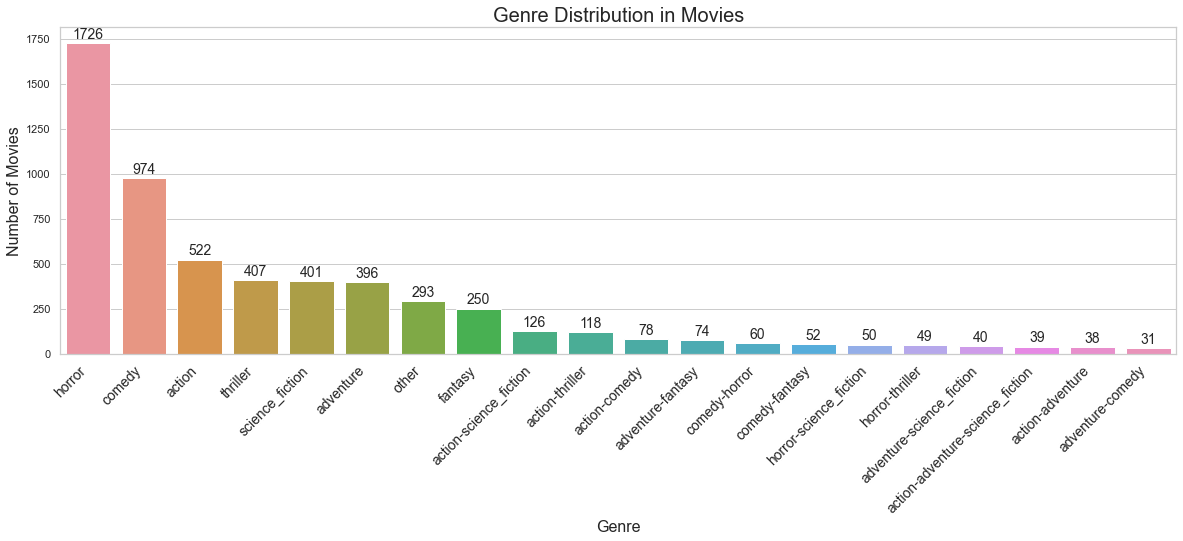

In [23]:
genre_counts = data_movie_artist_cleaned['Genre'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Genre', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Genre Distribution in Movies', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Movies over time 

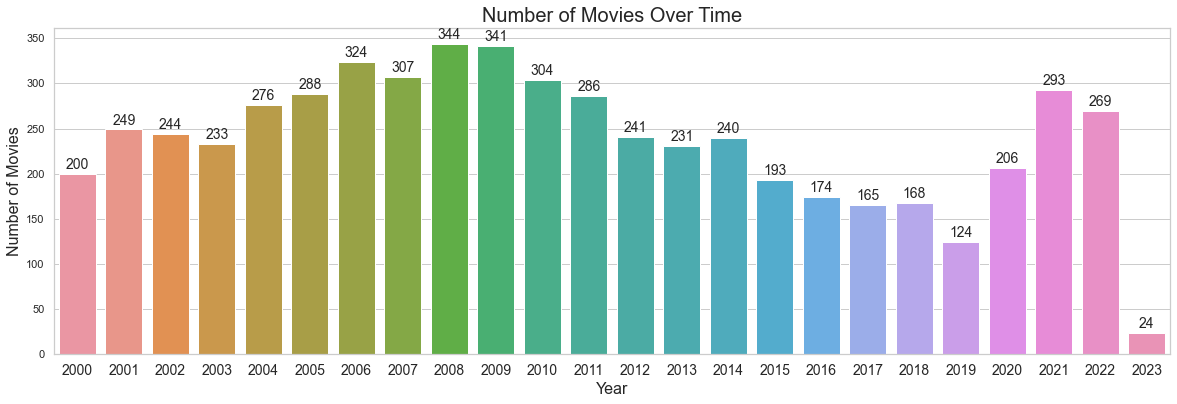

In [24]:
data_movie_artist_cleaned['Year'] = pd.to_numeric(data_movie_artist_cleaned['Year'], errors='coerce')
movies_per_year = data_movie_artist_cleaned.groupby('Year').size()
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Year', y='Number of Movies', data=movies_per_year)
plt.xticks(fontsize=14)
plt.title('Number of Movies Over Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

### Country distribution

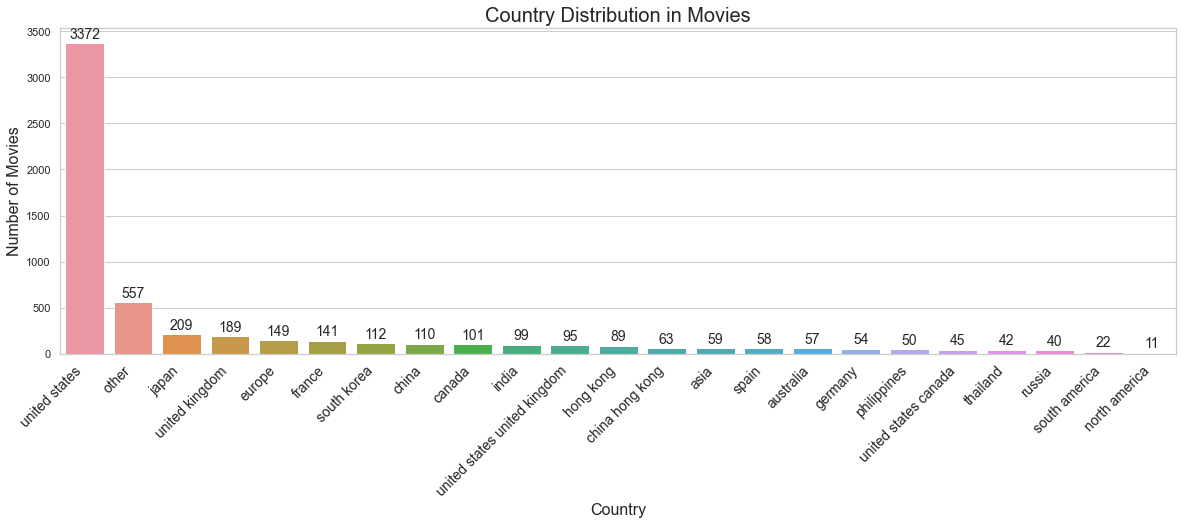

In [25]:
genre_counts = data_movie_artist_cleaned['Country'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Country', 'Count']

# Create the bar plot
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 6)) 
barplot = sns.barplot(x='Country', y='Count', data=genre_counts)

# Rotate the labels on x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.title('Country Distribution in Movies', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Add count numbers on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14)
plt.show()

# Network Science

### Creating undirected graph with nodes as artists and edges between artists that have collaborated in movie together

In [40]:
# # Create undirected Graph
G_artist = nx.Graph()

# Adding nodes
all_artist_nodes = list(list(df_results['Movie'].unique()))
G_artist.add_nodes_from(all_artist_nodes)

# Adding edges
for movie, connected_movies in zip(df_results['Movie'], df_results['Connected Movies']):
    G_artist.add_edges_from([(movie, col) for col in connected_movies])

In [61]:
node_attr = df_movies[['Title', 'Genre', 'Year']].set_index('Title').to_dict('index') 
nx.set_node_attributes(G_artist, node_attr) #Adding attributes to the graph

In [62]:
print("The network consist of: ", G_artist.number_of_edges(), " links")
print("The network consist of: ", G_artist.number_of_nodes(), " nodes (Movies)")

The network consist of:  34940  links
The network consist of:  5724  nodes (Movies)


In [43]:
# # Initialize the graph
# G_artist = nx.Graph()

# # Add nodes
# all_artist_nodes = list(list(artist_collaboration_df['Cast'].unique()))
# G_artist.add_nodes_from(all_artist_nodes)

# # Initialize a Counter to keep track of collaborations
# collaboration_counter = Counter()

# # Update the Counter with each collaboration
# for artist, collaborators in zip(artist_collaboration_df['Cast'], artist_collaboration_df['connected']):
#     for collaborator in collaborators:
#         if artist != collaborator:
#             collaboration_pair = tuple(sorted([artist, collaborator]))
#             collaboration_counter[collaboration_pair] += 1

# # Add weighted edges to the graph
# for (artist1, artist2), weight in collaboration_counter.items():
#     G_artist.add_edge(artist1, artist2, weight=weight)


In [63]:
print("The average degree of the GCC is:", round(sum(dict(G_artist.degree()).values())/len(G_artist.degree)))

The average degree of the GCC is: 12


### Extracting the largest component

In [64]:
#Extracting the largest component
connected_components = nx.connected_components(G_artist)
# Finding the largest connected component
largest_cc = max(connected_components, key=len)
# Creating a subgraph for the largest connected component
G_largest_cc = G_artist.subgraph(largest_cc).copy()

In [65]:
print("The largest connected component network consist of: ", G_largest_cc.number_of_edges(), " links")
print("The largest connected component network consist of: ", G_largest_cc.number_of_nodes(), " nodes (Movies)")

The largest connected component network consist of:  34562  links
The largest connected component network consist of:  4187  nodes (Movies)


In [66]:
print("The average degree of the GCC is:", round(sum(dict(G_largest_cc.degree()).values())/len(G_largest_cc.degree)))

The average degree of the GCC is: 17


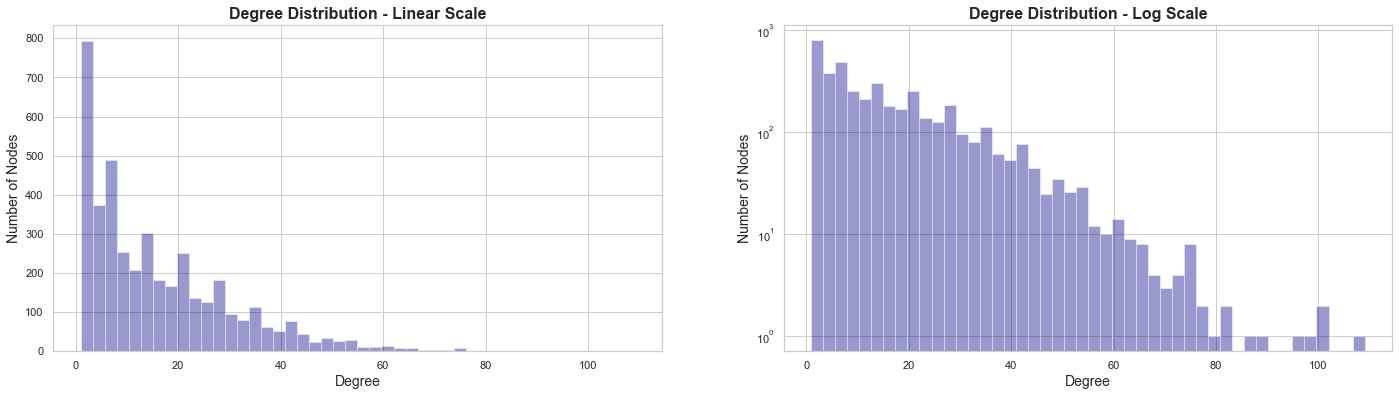

In [47]:
# Calculating degrees for each node
degrees = [G_largest_cc.degree(n) for n in G_largest_cc.nodes()]

# Convert the degrees list to a DataFrame
degrees_df = pd.DataFrame(degrees, columns=['Degree'])

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# First subplot for the regular scale histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Linear Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)

# Second subplot for the logarithmic scale histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.distplot(degrees_df['Degree'], kde=False, color='darkblue', hist_kws={'edgecolor':'white'})
plt.title('Degree Distribution - Log Scale', fontweight="bold", fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.yscale('log')

# Show the plot
plt.show()


### Top connected artists

In [48]:
degrees = dict(G_largest_cc.degree())
degrees_artists = {node: degree for node, degree in degrees.items()}
top_connected = sorted(degrees_artists, key=degrees_artists.get, reverse=True)[:5]
print("Top 5 connected artists: ", top_connected)


Top 5 connected artists:  ['Amsterdam', 'Don t Look Up', 'Thor Love and Thunder', 'Avengers Endgame', 'Dolittle']


### Plot the network

In [221]:
# The Force Atlas 2 algorithm
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs  # (NOT IMPLEMENTED)
                        linLogMode=False,   # (NOT IMPLEMENTED)
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=5.0,

                        # Performance
                        jitterTolerance=0.6,  # Not above 1. 1 is more precise
                        barnesHutOptimize=True,
                        barnesHutTheta=1, # Try 2
                        multiThreaded=False ,  # (NOT IMPLEMENTED)

                        # Tuning
                        scalingRatio=10.0, # Greater number equals less sparse graph
                        strongGravityMode=True,
                        gravity=1500, # Try 1000 is somewhat round but 2000 is very round

                        # Log
                        verbose=True)


In [222]:
positions = forceatlas2.forceatlas2_networkx_layout(G_largest_cc, pos=None, iterations=1000)

100%|██████████| 1000/1000 [01:34<00:00, 10.62it/s]

BarnesHut Approximation  took  20.05  seconds
Repulsion forces  took  70.77  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  1.17  seconds
AdjustSpeedAndApplyForces step  took  0.77  seconds


In [224]:
#Setting up node sizes (depends on degree)
d = dict(G_largest_cc.degree)
deg_size = [v * 3 for v in d.values()]

In [225]:
#Setting up node colors (depends on genre)
nodes_color = []
for node in G_largest_cc.nodes.data():
    if node[1]['Genre'] == 'horror':
        nodes_color.append('red')
    elif (node[1]['Genre'] == 'action'):
        nodes_color.append('#DA70D6')
    elif (node[1]['Genre'] == 'comedy'):
        nodes_color.append('blue')
    elif (node[1]['Genre'] == 'thriller'):
        nodes_color.append('#008080')
    elif (node[1]['Genre'] == 'science_fiction'):
        nodes_color.append('#4B0082')
    elif (node[1]['Genre'] == 'adventure'):
        nodes_color.append('yellow')
    elif (node[1]['Genre'] == 'fantasy'):
        nodes_color.append('orange')
    else:
        nodes_color.append('pink')

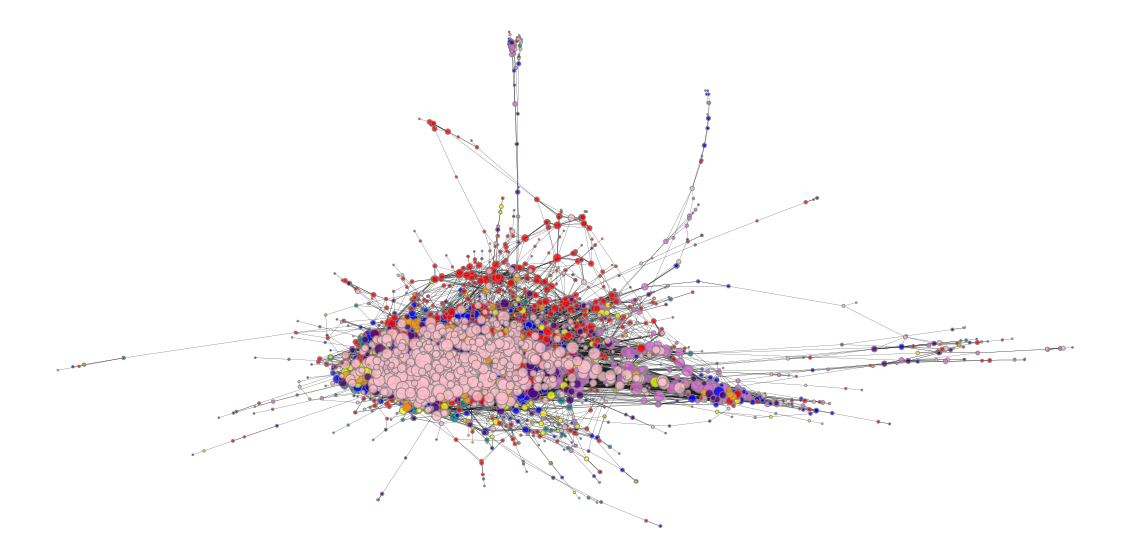

In [226]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G_largest_cc, positions, node_size=deg_size, node_color=nodes_color, alpha=0.80, edgecolors='grey')
nx.draw_networkx_edges(G_largest_cc, positions, width = 0.2)#, edge_color=edge_colors,width=0.5)
plt.axis('off')
plt.show()